In [2]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR")
import Utils.MajorContract_Offsets
import importlib

#importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation

#importlib.reload(Backtesting.Vectorized.lm_validation)

from Backtesting.Vectorized.lm_validation import LmValidation

## Zn. Freq=5.

In [20]:
freq=5
offset = [0.1+i for i in range(5)]

zn_train, zn_test, zn_probability_table = MajorContracts(symbol='zn', split_time = '2016-7-1', topdir=r'C:\\Users\\Maxcell-HomePC\\QishiQR\\Data',
                                          maturity={'1603':['2016-1-1','2016-2-29'],
                                                    '1604':['2016-2-1','2016-3-31'],
                                                    '1605':['2016-3-1','2016-4-30'],
                                                    '1606':['2016-4-1','2016-5-31'],
                                                    '1607':['2016-5-1','2016-6-30'],
                                                    '1608':['2016-6-1','2016-7-31'],
                                                    '1609':['2016-7-1','2016-8-31'],
                                                    '1610':['2016-8-1','2016-9-30'],
                                                    '1611':['2016-9-1','2016-10-31'],
                                                    '1612':['2016-10-1','2016-11-30'],
                                                    '1701':['2016-11-1','2016-12-31'],
                                                    '1702':['2016-12-1','2017-1-31']
                                                   },
                                          transitions = {'1603':'2016-2-1', 
                                                         '1604':'2016-3-1',
                                                         '1605':'2016-4-1',
                                                         '1606':'2016-5-1',
                                                         '1607':'2016-6-1',
                                                         '1608':'2016-7-1',
                                                         '1609':'2016-8-1',
                                                         '1610':'2016-9-1',
                                                         '1611':'2016-10-1',
                                                         '1612':'2016-11-1',
                                                         '1701':'2016-12-1',
                                                         '1702':'2017-1-1'
                                                        }, 
                                        freq = freq, offset = offset).create_major_overlap()


zn1603 C:\\Users\\wqiang\\QishiQR\\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
probability table:  20160104.0 20160130.0
probability table:  20160104 20160130
probability table:  20160104 20160130
probability table:  20160104 20160130
zn1604 C:\\Users\\wqiang\\QishiQR\\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
zn1605 C:\\Users\\wqiang\\QishiQR\\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
p

In [23]:
for offset in zn_test.keys():
    zn_test[offset].to_csv(r'../../Output/zn_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1603', '1604', '1605', '1606', '1607', '1608']:
        zn_probability_table[contract].to_csv(r'../../Strategy/zn_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [68]:
#zn
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_major_strategy_5_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
slm.to_csv('../../Strategy/zn_major_strategy.csv')
print(slm.head())

zn_1603_major_strategy_5_0.1.csv
zn_1603_major_strategy_5_1.1.csv
zn_1603_major_strategy_5_2.1.csv
zn_1603_major_strategy_5_3.1.csv
zn_1603_major_strategy_5_4.1.csv
zn_1604_major_strategy_5_0.1.csv
zn_1604_major_strategy_5_1.1.csv
zn_1604_major_strategy_5_2.1.csv
zn_1604_major_strategy_5_3.1.csv
zn_1604_major_strategy_5_4.1.csv
zn_1605_major_strategy_5_0.1.csv
zn_1605_major_strategy_5_1.1.csv
zn_1605_major_strategy_5_2.1.csv
zn_1605_major_strategy_5_3.1.csv
zn_1605_major_strategy_5_4.1.csv
zn_1606_major_strategy_5_0.1.csv
zn_1606_major_strategy_5_1.1.csv
zn_1606_major_strategy_5_2.1.csv
zn_1606_major_strategy_5_3.1.csv
zn_1606_major_strategy_5_4.1.csv
zn_1607_major_strategy_5_0.1.csv
zn_1607_major_strategy_5_1.1.csv
zn_1607_major_strategy_5_2.1.csv
zn_1607_major_strategy_5_3.1.csv
zn_1607_major_strategy_5_4.1.csv
zn_1608_major_strategy_5_0.1.csv
zn_1608_major_strategy_5_1.1.csv
zn_1608_major_strategy_5_2.1.csv
zn_1608_major_strategy_5_3.1.csv
zn_1608_major_strategy_5_4.1.csv
   prior  

In [69]:
p1 = slm[slm['prior'].apply(len) == 2]
p2 = slm[slm['prior'].apply(len) == 3]
p3 = slm[slm['prior'].apply(len) == 4]
p4 = slm[slm['prior'].apply(len) == 5]
p5 = slm[slm['prior'].apply(len) == 6]
p6 = slm[slm['prior'].apply(len) == 7]

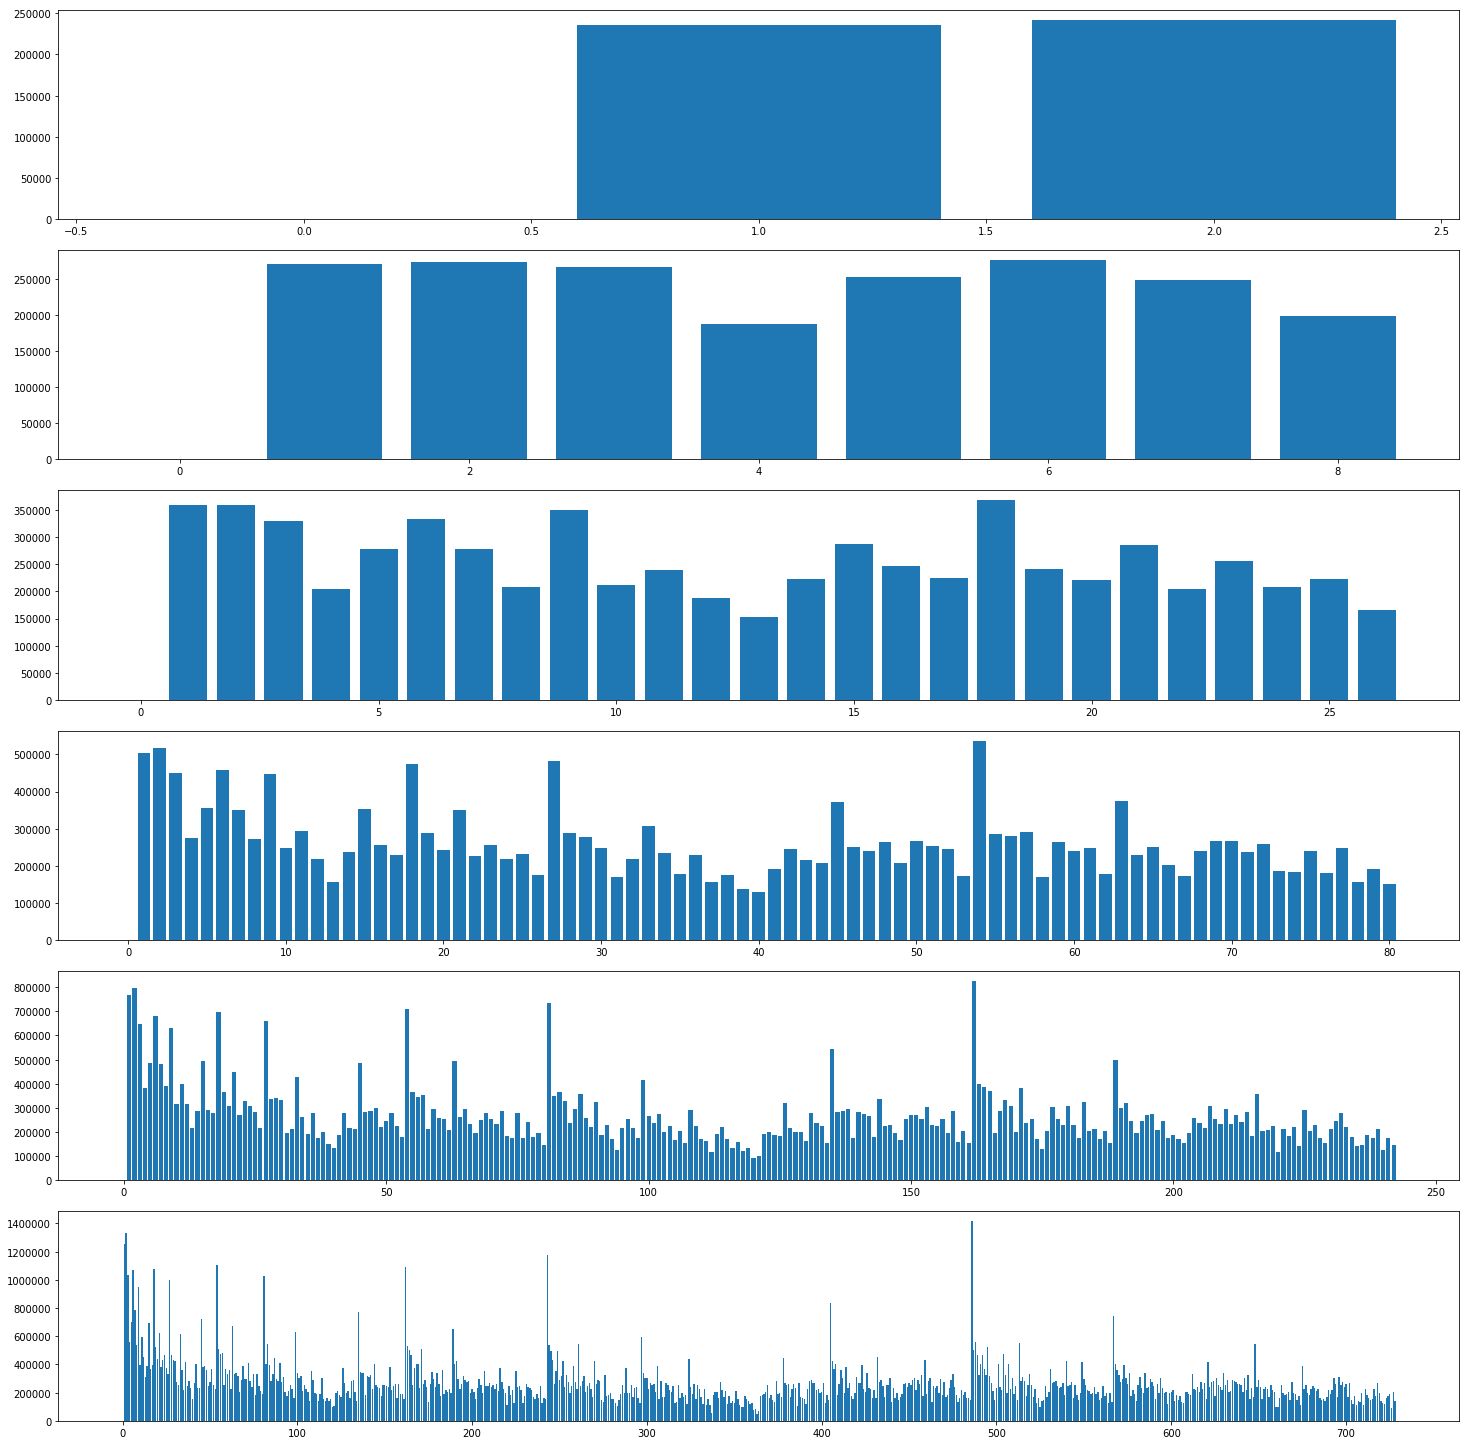

In [59]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['total'].tolist()
cnt_list1[0] = 0
cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['total'].tolist()
cnt_list2[0] = 0
cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['total'].tolist()
cnt_list3[0] = 0
cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['total'].tolist()
cnt_list4[0] = 0
cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['total'].tolist()
cnt_list5[0] = 0
cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['total'].tolist()
cnt_list6[0] = 0
cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()

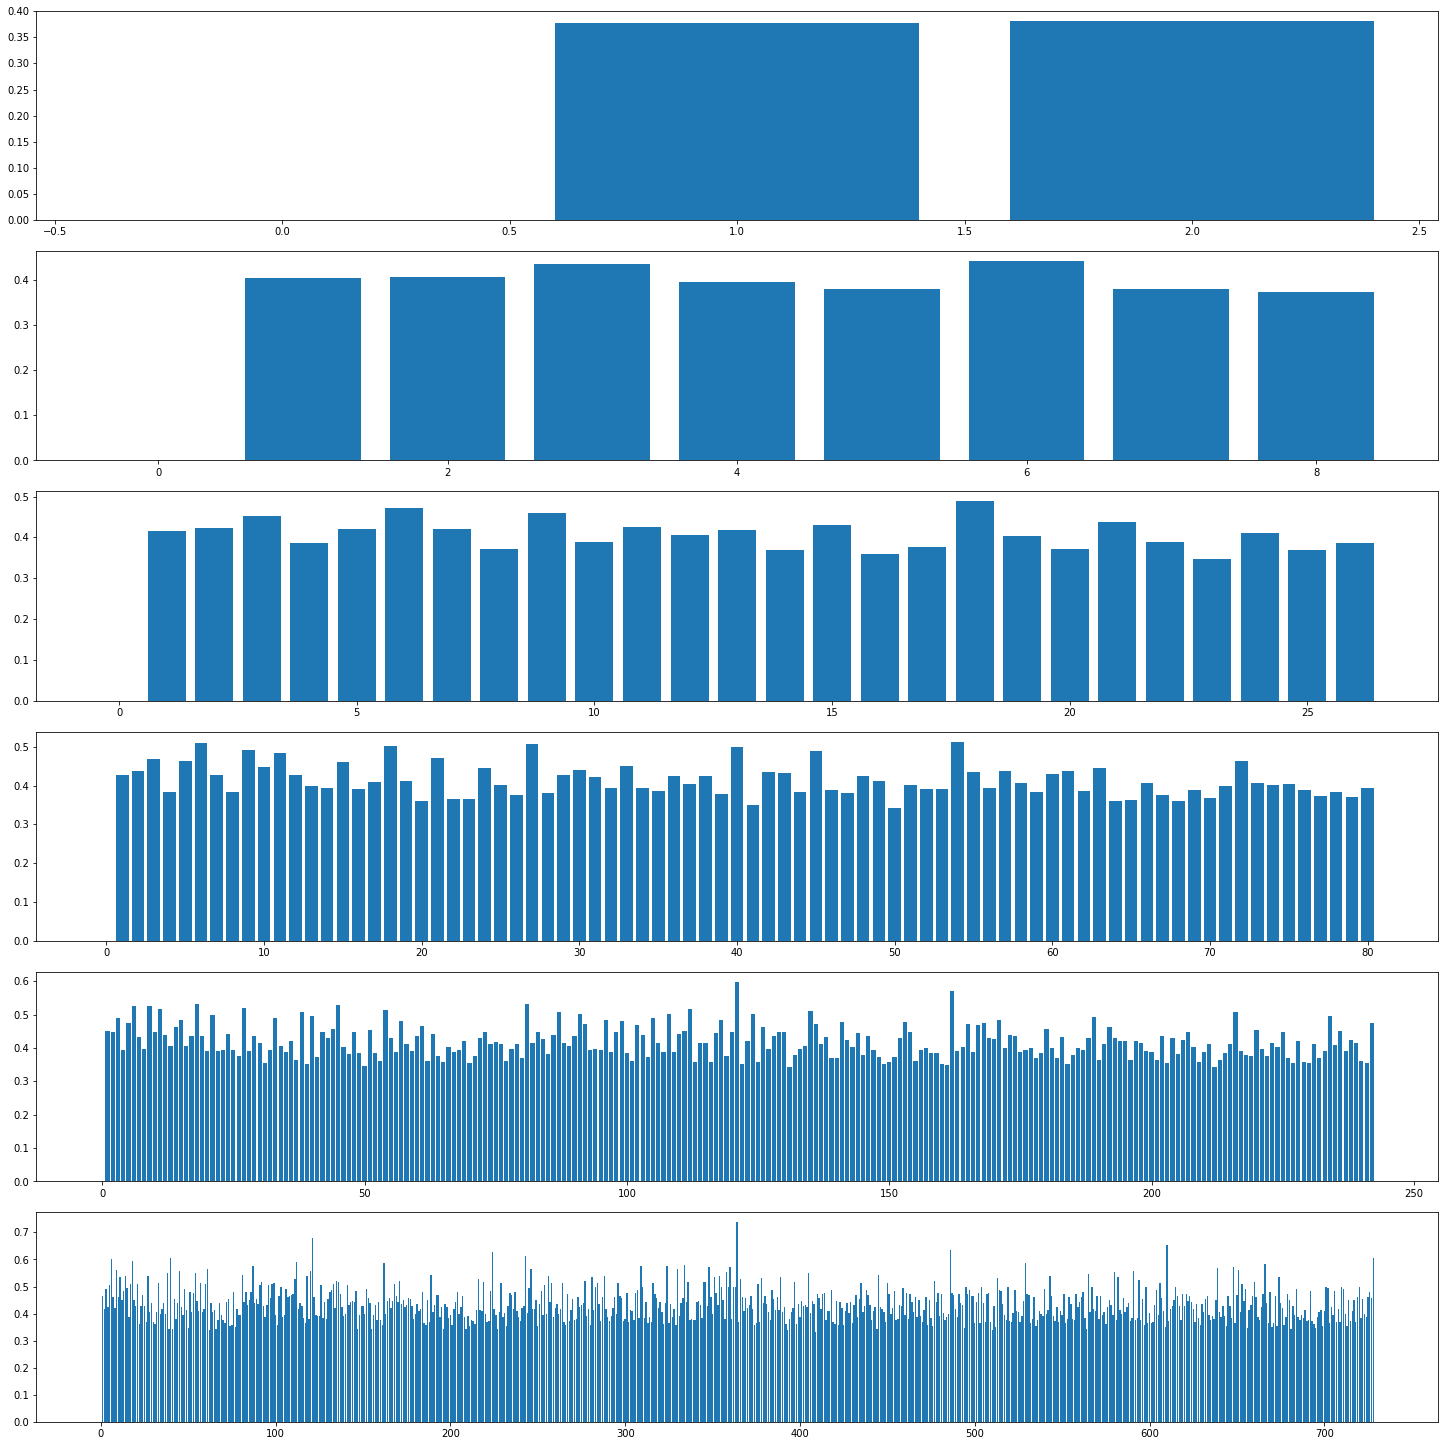

In [70]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['max_pct'].tolist()
cnt_list1[0] = 0
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['max_pct'].tolist()
cnt_list2[0] = 0
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['max_pct'].tolist()
cnt_list3[0] = 0
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['max_pct'].tolist()
cnt_list4[0] = 0
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['max_pct'].tolist()
cnt_list5[0] = 0
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['max_pct'].tolist()
cnt_list6[0] = 0
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()

# Zn. Freq=15.

In [4]:
freq= 15
offset = [0.1+i*3 for i in range(5)]

zn_train, zn_test, zn_probability_table = MajorContracts(symbol='zn', split_time = '2016-7-1', topdir=r'C:\\Users\\Maxcell-HomePC\\QishiQR\\Data',
                                          maturity={'1603':['2016-1-1','2016-2-29'],
                                                    '1604':['2016-2-1','2016-3-31'],
                                                    '1605':['2016-3-1','2016-4-30'],
                                                    '1606':['2016-4-1','2016-5-31'],
                                                    '1607':['2016-5-1','2016-6-30'],
                                                    '1608':['2016-6-1','2016-7-31'],
                                                    '1609':['2016-7-1','2016-8-31'],
                                                    '1610':['2016-8-1','2016-9-30'],
                                                    '1611':['2016-9-1','2016-10-31'],
                                                    '1612':['2016-10-1','2016-11-30'],
                                                    '1701':['2016-11-1','2016-12-31'],
                                                    '1702':['2016-12-1','2017-1-31']
                                                   },
                                          transitions = {'1603':'2016-2-1', 
                                                         '1604':'2016-3-1',
                                                         '1605':'2016-4-1',
                                                         '1606':'2016-5-1',
                                                         '1607':'2016-6-1',
                                                         '1608':'2016-7-1',
                                                         '1609':'2016-8-1',
                                                         '1610':'2016-9-1',
                                                         '1611':'2016-10-1',
                                                         '1612':'2016-11-1',
                                                         '1701':'2016-12-1',
                                                         '1702':'2017-1-1'
                                                        }, 
                                        freq = freq, offset = offset).create_major_overlap()


zn1603 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
probability table:  20160104 20160130
probability table:  20160104 20160130
probability table:  20160104 20160130
probability table:  20160104 20160130
zn1604 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130 20160229
probability table:  20160130 20160229
probability table:  20160130 20160229
zn1605 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00

In [10]:
for offset in zn_test.keys():
    zn_test[offset].to_csv(r'../../Output/zn_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1603', '1604', '1605', '1606', '1607', '1608']:
        zn_probability_table[contract].to_csv(r'../../Strategy/zn_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [9]:
#zn
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_major_strategy_15_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
slm.to_csv('../../Strategy/zn_major_strategy_'+str(freq)+'min.csv')
print(slm.head())

zn_1603_major_strategy_15_0.1.csv
zn_1603_major_strategy_15_1.1.csv
zn_1603_major_strategy_15_12.1.csv
zn_1603_major_strategy_15_2.1.csv
zn_1603_major_strategy_15_3.1.csv
zn_1603_major_strategy_15_4.1.csv
zn_1603_major_strategy_15_6.1.csv
zn_1603_major_strategy_15_9.1.csv
zn_1604_major_strategy_15_0.1.csv
zn_1604_major_strategy_15_1.1.csv
zn_1604_major_strategy_15_12.1.csv
zn_1604_major_strategy_15_2.1.csv
zn_1604_major_strategy_15_3.1.csv
zn_1604_major_strategy_15_4.1.csv
zn_1604_major_strategy_15_6.1.csv
zn_1604_major_strategy_15_9.1.csv
zn_1605_major_strategy_15_0.1.csv
zn_1605_major_strategy_15_1.1.csv
zn_1605_major_strategy_15_12.1.csv
zn_1605_major_strategy_15_2.1.csv
zn_1605_major_strategy_15_3.1.csv
zn_1605_major_strategy_15_4.1.csv
zn_1605_major_strategy_15_6.1.csv
zn_1605_major_strategy_15_9.1.csv
zn_1606_major_strategy_15_0.1.csv
zn_1606_major_strategy_15_1.1.csv
zn_1606_major_strategy_15_12.1.csv
zn_1606_major_strategy_15_2.1.csv
zn_1606_major_strategy_15_3.1.csv
zn_1606_ma

In [11]:
p1 = slm[slm['prior'].apply(len) == 2]
p2 = slm[slm['prior'].apply(len) == 3]
p3 = slm[slm['prior'].apply(len) == 4]
p4 = slm[slm['prior'].apply(len) == 5]
p5 = slm[slm['prior'].apply(len) == 6]
p6 = slm[slm['prior'].apply(len) == 7]

## total count distribution 

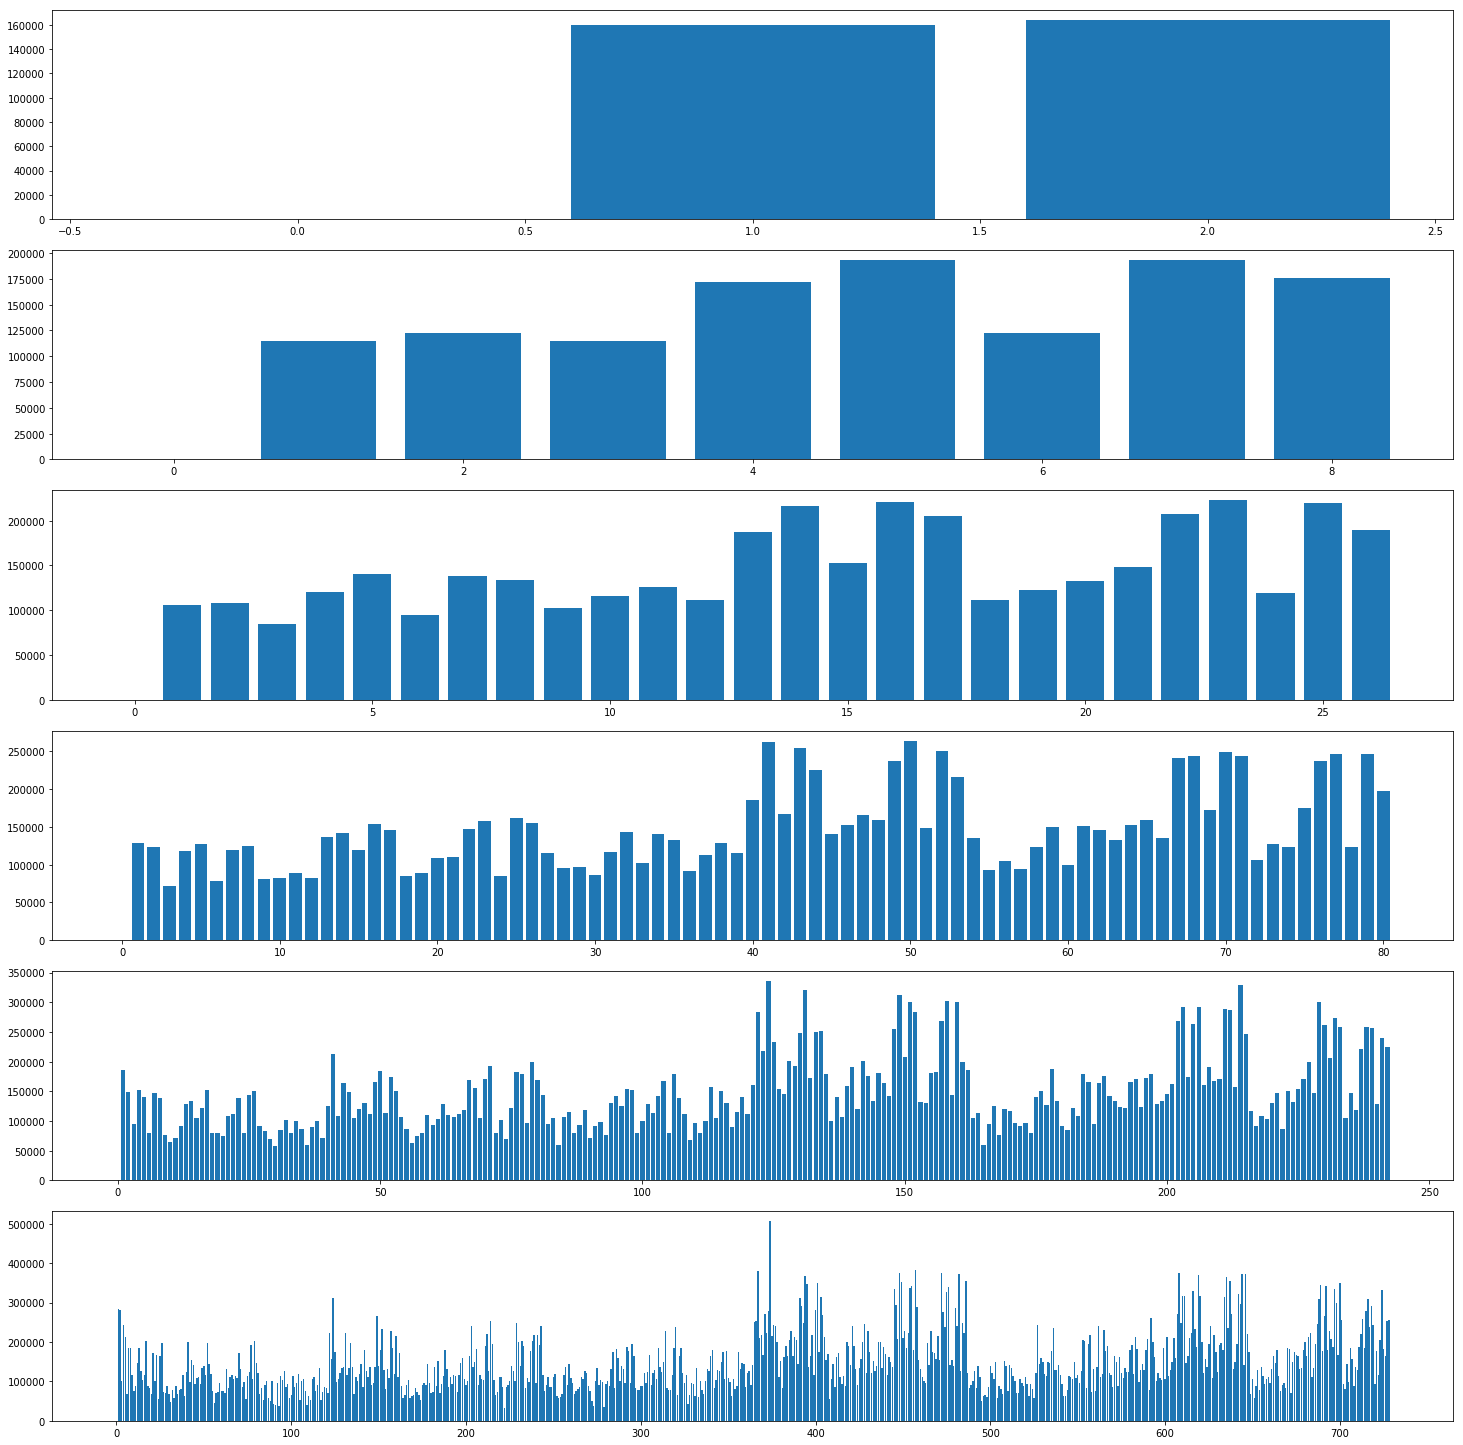

In [12]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['total'].tolist()
cnt_list1[0] = 0
cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['total'].tolist()
cnt_list2[0] = 0
cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['total'].tolist()
cnt_list3[0] = 0
cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['total'].tolist()
cnt_list4[0] = 0
cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['total'].tolist()
cnt_list5[0] = 0
cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['total'].tolist()
cnt_list6[0] = 0
cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()

# max_pct distribution

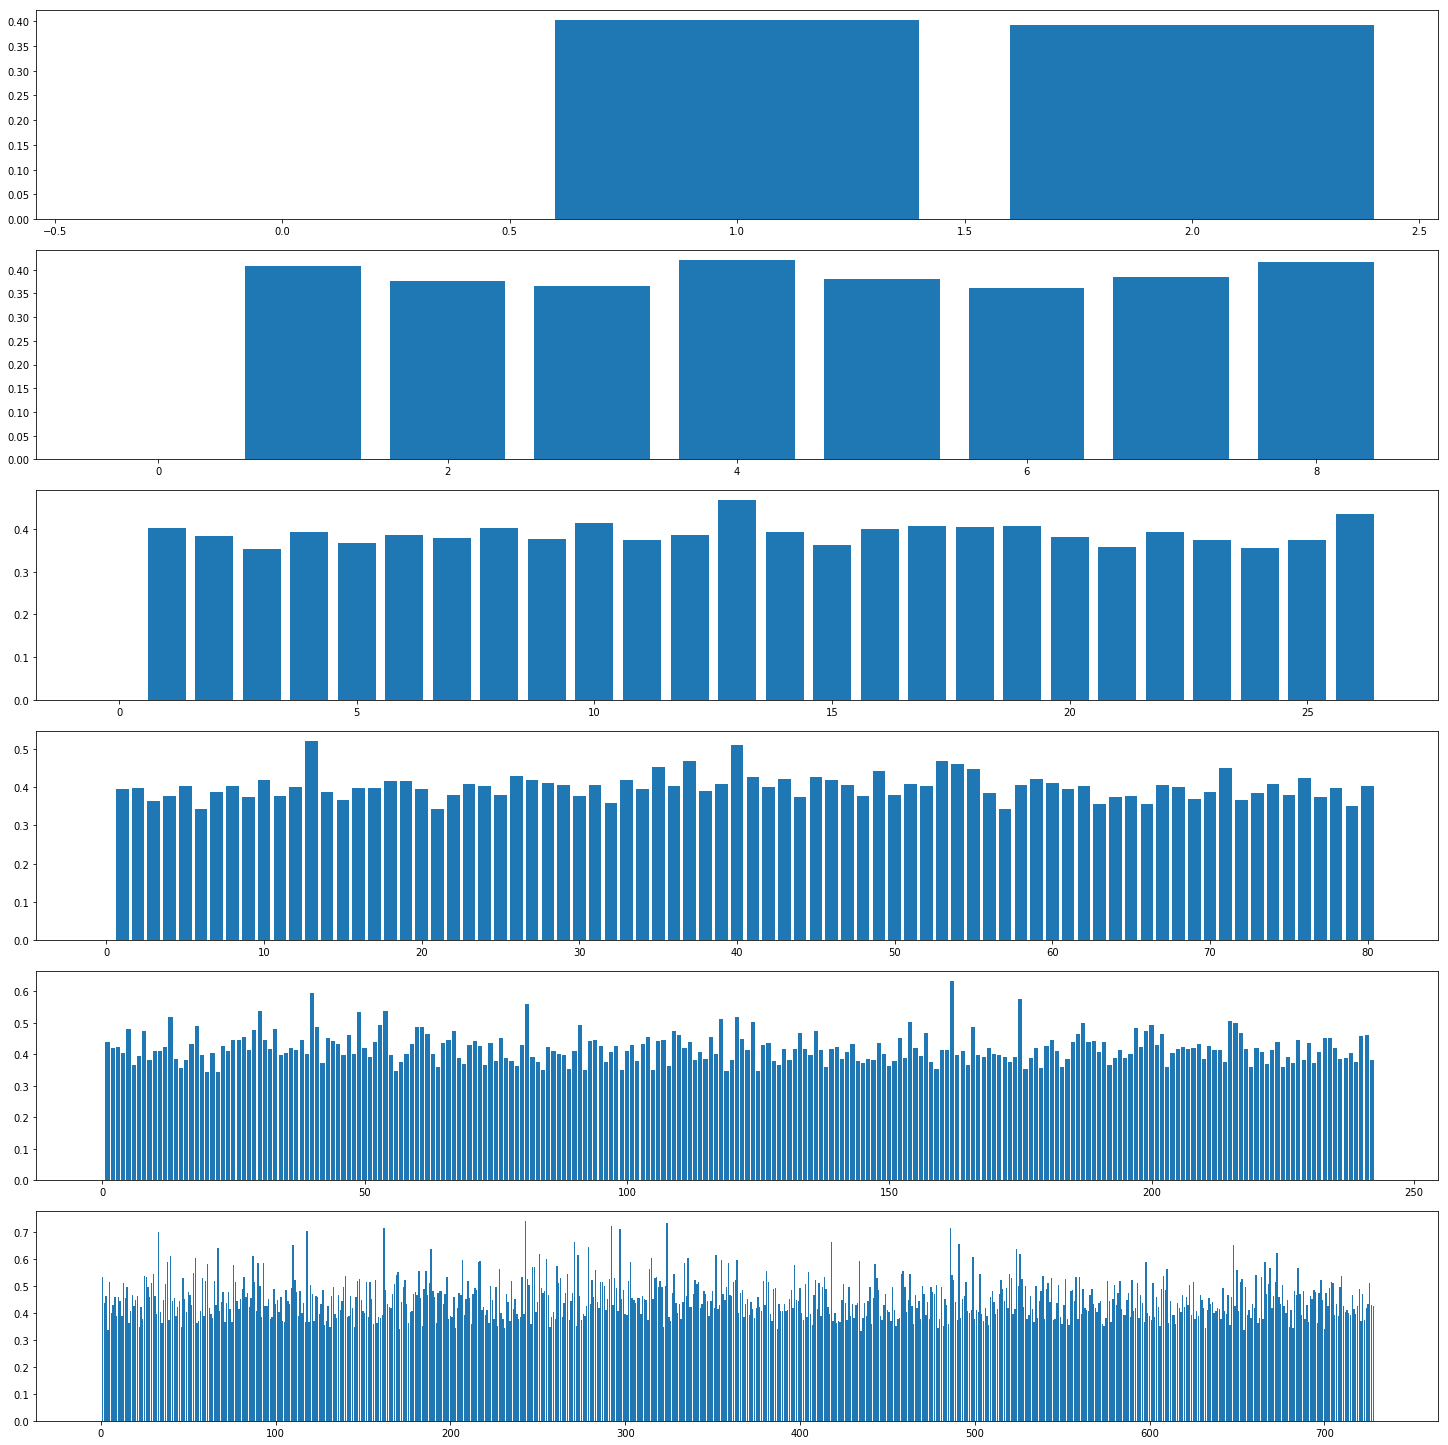

In [13]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['max_pct'].tolist()
cnt_list1[0] = 0
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['max_pct'].tolist()
cnt_list2[0] = 0
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['max_pct'].tolist()
cnt_list3[0] = 0
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['max_pct'].tolist()
cnt_list4[0] = 0
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['max_pct'].tolist()
cnt_list5[0] = 0
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['max_pct'].tolist()
cnt_list6[0] = 0
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()